<a href="https://colab.research.google.com/github/divyaSHARMA7903/-Fashion_MNIST-CNN-Project/blob/main/CNN_Project_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras # to build Neural Network

## Load Data

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [ ]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0] #9 => Ankle boot

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot '

## Show image

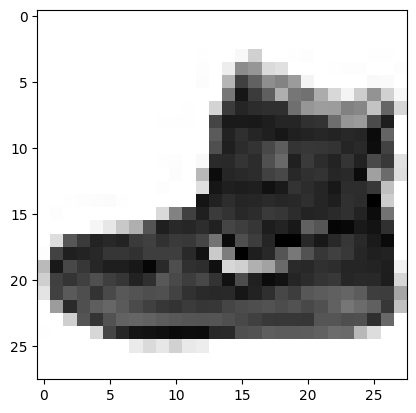

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

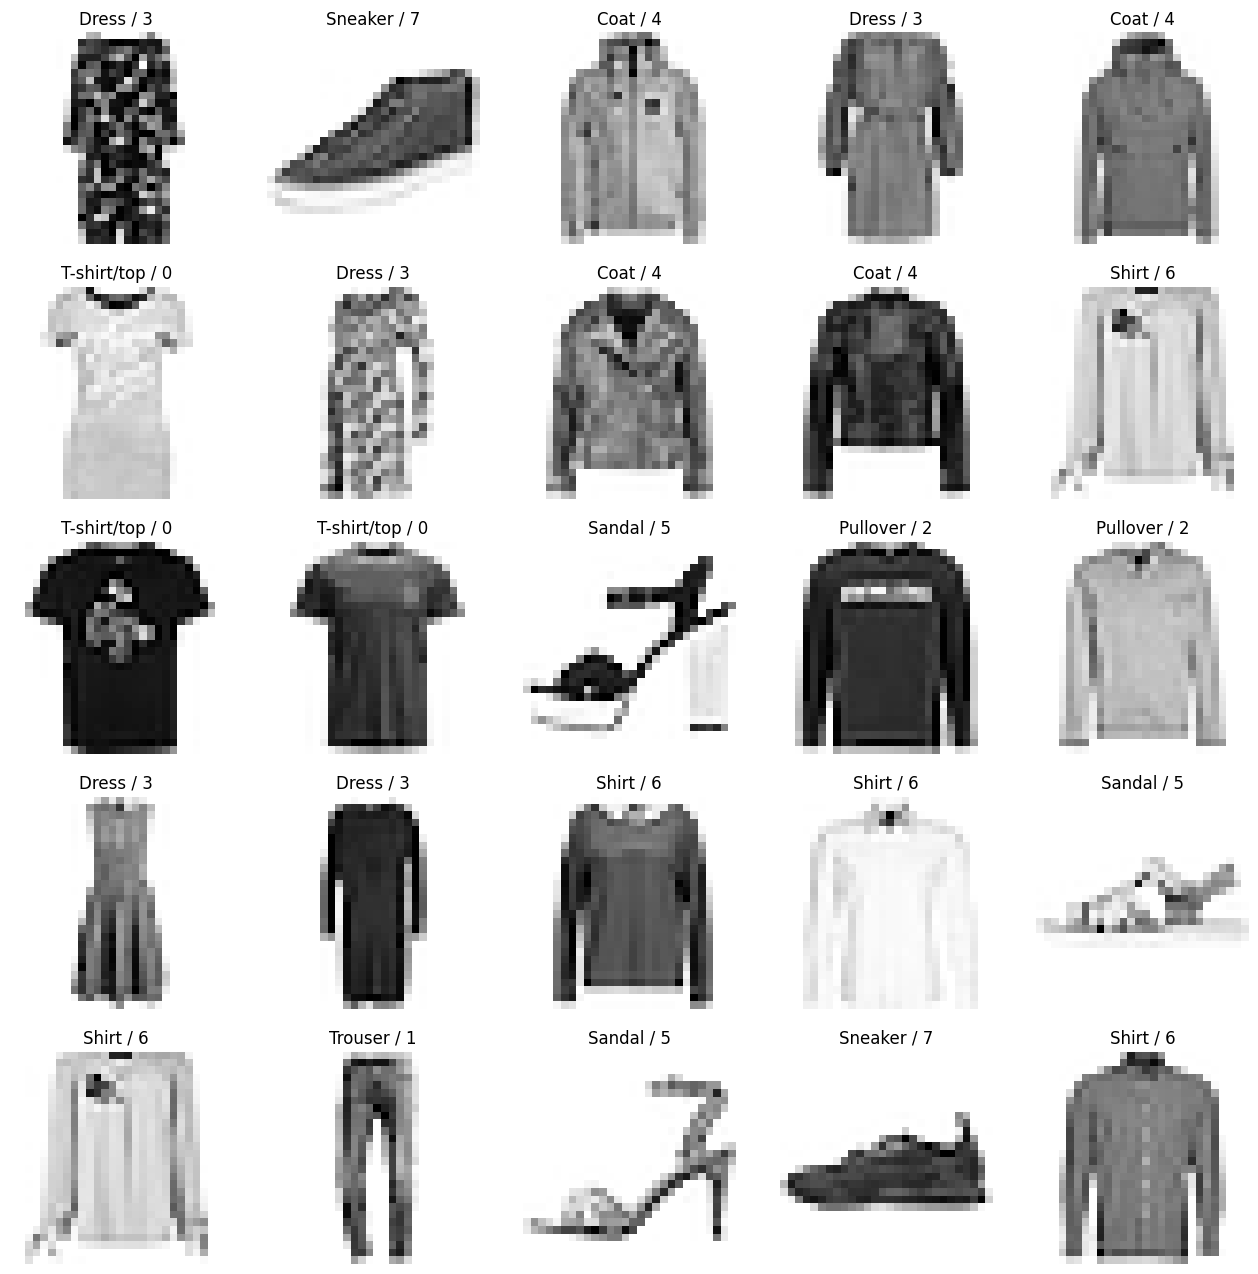

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))



## Change Dimention

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [ ]:
X_train.ndim

4

## Feature Scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

## Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [ ]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# Convolutional Neural Network - Model Building

In [ ]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 43s 456ms/step - loss: 0.6240 - accuracy: 0.7884 - val_loss: 0.4187 - val_accuracy: 0.8570
Epoch 2/10
94/94 [==============================] - 23s 245ms/step - loss: 0.3764 - accuracy: 0.8677 - val_loss: 0.3693 - val_accuracy: 0.8723
Epoch 3/10
94/94 [==============================] - 22s 234ms/step - loss: 0.3252 - accuracy: 0.8852 - val_loss: 0.3266 - val_accuracy: 0.8859
Epoch 4/10
94/94 [==============================] - 22s 231ms/step - loss: 0.2970 - accuracy: 0.8945 - val_loss: 0.3050 - val_accuracy: 0.8926
Epoch 5/10
94/94 [==============================] - 23s 247ms/step - loss: 0.2753 - accuracy: 0.9011 - val_loss: 0.2981 - val_accuracy: 0.8932
Epoch 6/10
94/94 [==============================] - 23s 246ms/step - loss: 0.2556 - accuracy: 0.9086 - val_loss: 0.2912 - val_accuracy: 0.8957
Epoch 7/10
94/94 [==============================] - 24s 257ms/step - loss: 0.2426 - accuracy: 0.9130 - val_loss: 0.2805 - val_accuracy: 0.8992

# Test the Model

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 9ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.23, 0.04, 0.01]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2741 - accuracy: 0.9004


[0.2741200923919678, 0.9003999829292297]

# Visualize output

In [ ]:
"""plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off') """

"plt.figure(figsize=(16,16))\n\nj=1\nfor i in np.random.randint(0, 1000,25):\n  plt.subplot(5,5, j); j+=1\n  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')\n  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))\n  plt.axis('off') "

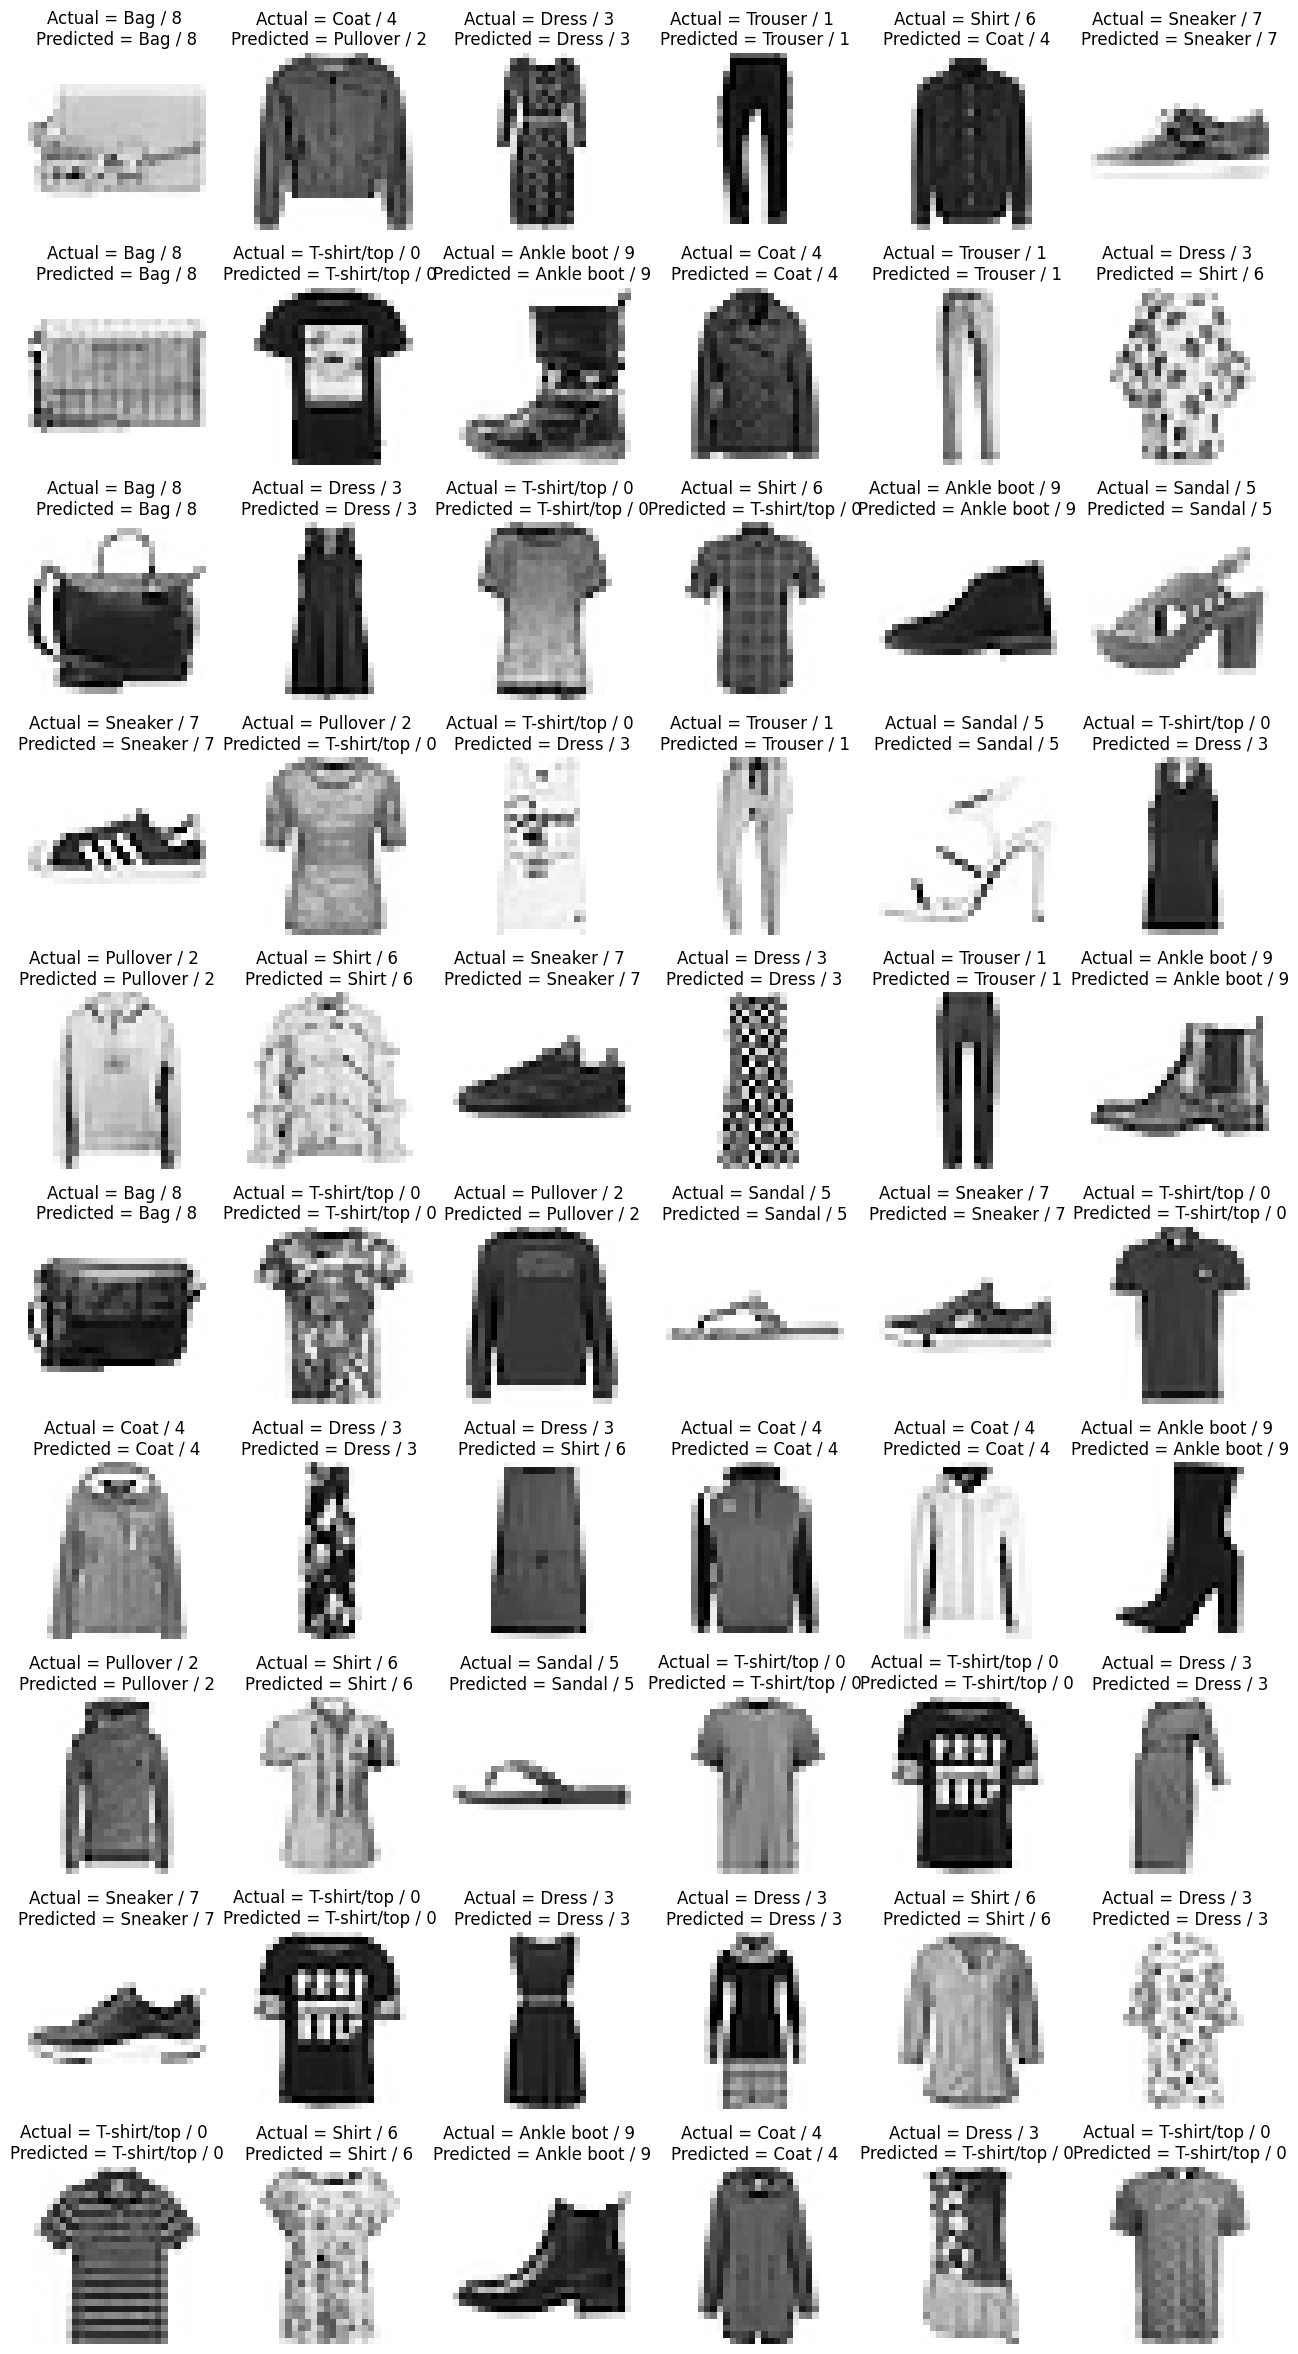

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

## Confusion Matrix

<Axes: >

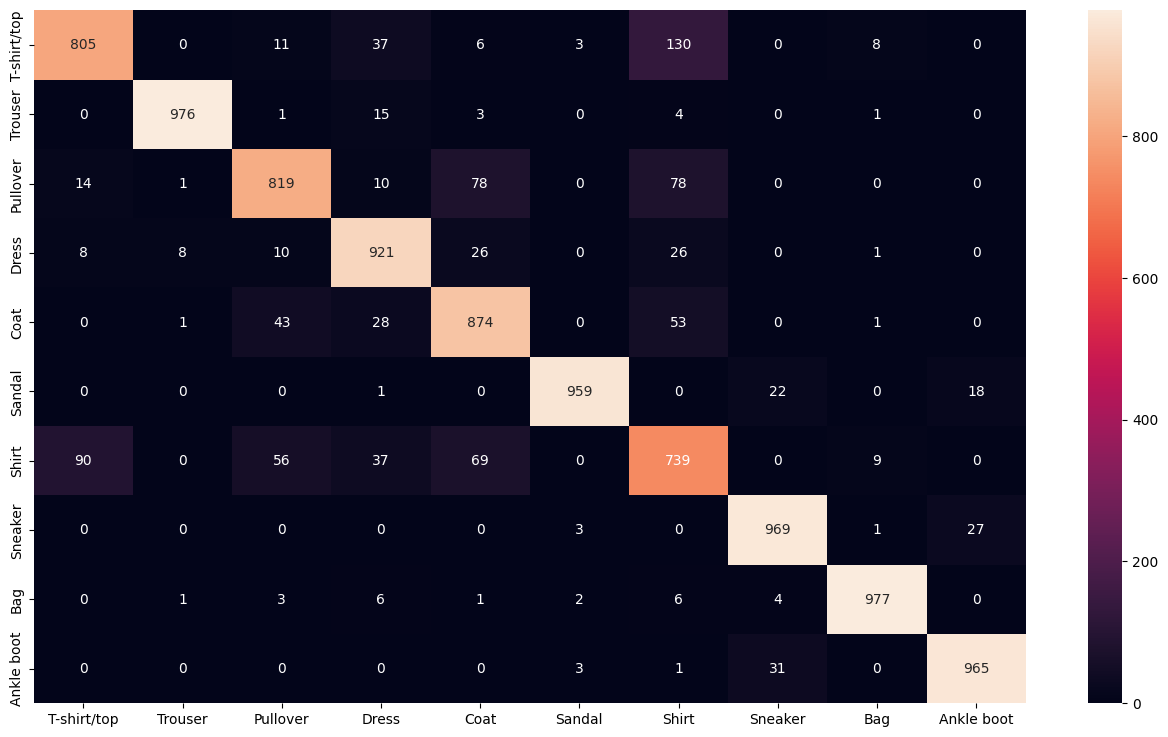

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.81      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.82      0.84      1000
       Dress       0.87      0.92      0.90      1000
        Coat       0.83      0.87      0.85      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.71      0.74      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Save Model

In [ ]:
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [ ]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 [==============================] - 0s 95ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [ ]:
np.argmax(Y_pred_sample[0])

9

In [ ]:
y_test[0]

9

# Convolutional Neural Network - Building Complex Model

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 27s 283ms/step - loss: 0.2124 - accuracy: 0.9214 - val_loss: 0.2723 - val_accuracy: 0.9043
Epoch 2/20
94/94 [==============================] - 29s 303ms/step - loss: 0.2086 - accuracy: 0.9239 - val_loss: 0.2549 - val_accuracy: 0.9097
Epoch 3/20
94/94 [==============================] - 26s 274ms/step - loss: 0.2031 - accuracy: 0.9231 - val_loss: 0.2580 - val_accuracy: 0.9094
Epoch 4/20
94/94 [==============================] - 26s 275ms/step - loss: 0.1938 - accuracy: 0.9285 - val_loss: 0.2540 - val_accuracy: 0.9097
Epoch 5/20
94/94 [==============================] - 27s 289ms/step - loss: 0.1915 - accuracy: 0.9293 - val_loss: 0.2658 - val_accuracy: 0.9093
Epoch 6/20
94/94 [==============================] - 28s 301ms/step - loss: 0.1878 - accuracy: 0.9305 - val_loss: 0.2681 - val_accuracy: 0.9072
Epoch 7/20
94/94 [==============================] - 27s 292ms/step - loss: 0.1818 - accuracy: 0.9320 - val_loss: 0.2546 - val_accuracy: 0.9128

In [ ]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

######## very complex model

In [ ]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 69s 715ms/step - loss: 1.2529 - accuracy: 0.4972 - val_loss: 0.6414 - val_accuracy: 0.7531
Epoch 2/50
94/94 [==============================] - 66s 699ms/step - loss: 0.6094 - accuracy: 0.7710 - val_loss: 0.5147 - val_accuracy: 0.8012
Epoch 3/50
94/94 [==============================] - 61s 645ms/step - loss: 0.4988 - accuracy: 0.8150 - val_loss: 0.4309 - val_accuracy: 0.8369
Epoch 4/50
94/94 [==============================] - 63s 671ms/step - loss: 0.4311 - accuracy: 0.8450 - val_loss: 0.3676 - val_accuracy: 0.8653
Epoch 5/50
94/94 [==============================] - 62s 657ms/step - loss: 0.3856 - accuracy: 0.8639 - val_loss: 0.3430 - val_accuracy: 0.8739
Epoch 6/50
94/94 [==============================] - 62s 657ms/step - loss: 0.3413 - accuracy: 0.8806 - val_loss: 0.3294 - val_accuracy: 0.8827
Epoch 7/50
94/94 [==============================] - 63s 667ms/step - loss: 0.3187 - accuracy: 0.8870 - val_loss: 0.3180 - val_accuracy: 0.8863

In [ ]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [ ]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.4575 - accuracy: 0.8986


[0.4574587047100067, 0.8985999822616577]

In [ ]:
#End